# Install and Import Packages

In [1]:
# install this package 
!pip install pandas-datareader

In [15]:
# import packages
import pandas as pd
import numpy as np
import pandas_datareader as pdr
import matplotlib.pyplot as plt
%matplotlib inline

# Gather Data From Yahoo Finanace

In [16]:
# Setting dates of data pull
startdate = '2017-01-01'
enddate = '2020-12-31'

# Apply Pandas DataReader
AMD = pdr.DataReader('AMD','yahoo', startdate, enddate)
AAPL = pdr.DataReader('AAPL','yahoo', startdate, enddate)
MSFT = pdr.DataReader('MSFT','yahoo', startdate, enddate)
ORCL = pdr.DataReader('ORCL','yahoo', startdate, enddate)

In [ ]:
AMD.head()

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2017-01-03,11.65,11.02,11.42,11.43,55182000,11.43
2017-01-04,11.52,11.24,11.45,11.43,40781200,11.43
2017-01-05,11.69,11.23,11.43,11.24,38855200,11.24
2017-01-06,11.49,11.11,11.29,11.32,34453500,11.32
2017-01-09,11.64,11.31,11.37,11.49,37304800,11.49


In [6]:
AMD.tail()

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2020-12-24,92.510002,91.309998,91.800003,91.809998,16705900,91.809998
2020-12-28,93.139999,90.820000,92.930000,91.599998,30627300,91.599998
2020-12-29,92.459999,89.430000,91.660004,90.620003,31748200,90.620003
2020-12-30,92.849998,90.190002,90.779999,92.290001,25845000,92.290001
2020-12-31,92.300003,90.870003,92.099998,91.709999,24930700,91.709999


# Create a Portfolio of Selected Stocks

In [17]:
# Normalizing stock prices (cumulative return)
for stock in (AMD, AAPL, MSFT, ORCL):
    stock ['Normalizing Return'] = stock['Adj Close']/stock.iloc[0]['Adj Close']

In [18]:
# Example of ORCL from the for loop
stock.head()

,High,Low,Open,Close,Volume,Adj Close,Normalizing Return
Date,,,,,,,
2017-01-03,38.689999,38.299999,38.450001,38.549999,11051300.0,35.401367,1.000000
2017-01-04,38.919998,38.549999,38.549999,38.740002,9545500.0,35.575851,1.004929
2017-01-05,38.950001,38.410000,38.669998,38.639999,12064700.0,35.484020,1.002335
2017-01-06,38.750000,38.380001,38.750000,38.450001,14829700.0,35.309540,0.997406
2017-01-09,39.450001,38.470001,38.529999,39.029999,15587900.0,35.842171,1.012452


In [36]:
# Setting weights
for stock, allo in zip((AMD, AAPL, MSFT, ORCL), [0.25,0.25,0.25,0.25]):
    stock['Allocation'] = stock['Normalizing Return']*allo

In [32]:
# Examining the allocation of a stock
MSFT.head()

,High,Low,Open,Close,Volume,Adj Close,Normalizing Return,Allocation
Date,,,,,,,,
2017-01-03,62.840000,62.130001,62.790001,62.580002,20694100.0,57.930538,1.000000,0.250000
2017-01-04,62.750000,62.119999,62.480000,62.299999,21340000.0,57.671329,0.995526,0.248881
2017-01-05,62.660000,62.029999,62.189999,62.299999,24876000.0,57.671329,0.995526,0.248881
2017-01-06,63.150002,62.040001,62.299999,62.840000,19922900.0,58.171207,1.004154,0.251039
2017-01-09,63.080002,62.540001,62.759998,62.639999,20382700.0,57.986065,1.000959,0.250240


In [37]:
# Assigning a value of $10,000 to the portfolio
for stock in (AMD, AAPL, MSFT, ORCL):
    stock['Position Value'] = stock['Allocation']*10000

In [34]:
# Examining the amount in AMD
AMD.head()

,High,Low,Open,Close,Volume,Adj Close,Normalizing Return,Allocation,Position Value
Date,,,,,,,,,
2017-01-03,11.65,11.02,11.42,11.43,55182000,11.43,1.000000,0.250000,2500.000000
2017-01-04,11.52,11.24,11.45,11.43,40781200,11.43,1.000000,0.250000,2500.000000
2017-01-05,11.69,11.23,11.43,11.24,38855200,11.24,0.983377,0.245844,2458.442579
2017-01-06,11.49,11.11,11.29,11.32,34453500,11.32,0.990376,0.247594,2475.940375
2017-01-09,11.64,11.31,11.37,11.49,37304800,11.49,1.005249,0.251312,2513.123242


# Setting Up Portfolio Dollar Values

In [38]:
# Create a list of all position values
position_values = [AMD['Position Value'], AAPL['Position Value'], MSFT['Position Value'], ORCL['Position Value']]

# Concatenate the list of position values
position_values = pd.concat(position_values, axis=1)

# Name columns
position_values. columns = ['AMD','AAPL','MSFT','ORCL']

# Add a total for entire portfolio
position_values['Total'] = position_values.sum(axis=1)
position_values.head()

,AMD,AAPL,MSFT,ORCL,Total
Date,,,,,
2017-01-03,2500.000000,2500.000000,2500.000000,2500.000000,10000.000000
2017-01-04,2500.000000,2497.202232,2488.813815,2512.321858,9998.337905
2017-01-05,2458.442579,2509.901088,2488.813815,2505.836854,9962.994336
2017-01-06,2475.940375,2537.882621,2510.386113,2493.515265,10017.724373
2017-01-09,2513.123242,2561.128257,2502.396263,2531.128990,10107.776754


<AxesSubplot:title={'center':'10K Portfolio'}, xlabel='Date'>

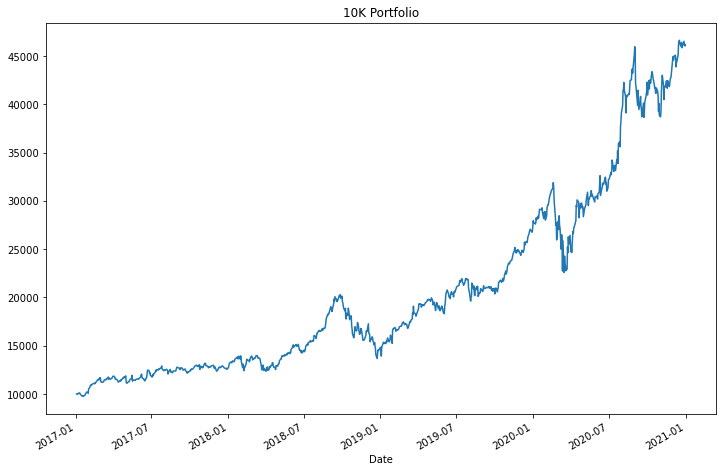

In [39]:
# Plot total portfolio
position_values['Total'].plot(figsize=(12,8), title='10K Portfolio')

<AxesSubplot:title={'center':'Individual Stocks From Portfolio'}, xlabel='Date'>

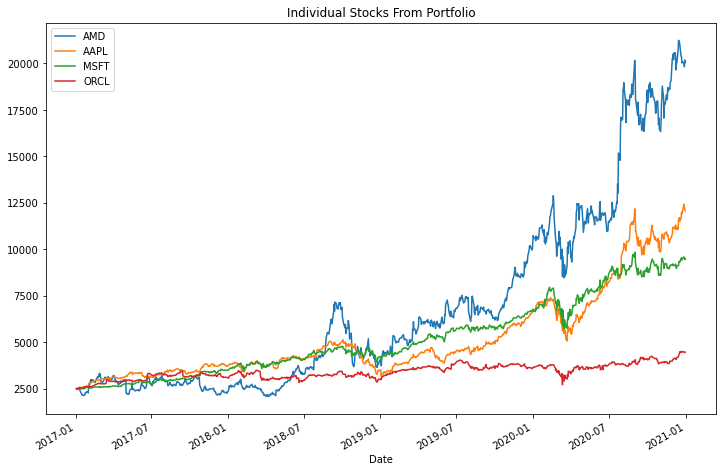

In [41]:
# Plotting each stock within portfolio
position_values.drop('Total', axis=1).plot(figsize=(12,8), title='Individual Stocks From Portfolio')

In [45]:
# Cumulative portfolio return in terms of percent
cumulative_return = (position_values['Total'][-1]/position_values['Total'][0]-1)*100
cumulative_return

360.6330395394369

# Daily Returns

In [46]:
# Calculating daily returns
position_values['Daily Return'] = position_values['Total'].pct_change(1)
position_values.head()

,AMD,AAPL,MSFT,ORCL,Total,Daily Return
Date,,,,,,
2017-01-03,2500.000000,2500.000000,2500.000000,2500.000000,10000.000000,NaN
2017-01-04,2500.000000,2497.202232,2488.813815,2512.321858,9998.337905,-0.000166
2017-01-05,2458.442579,2509.901088,2488.813815,2505.836854,9962.994336,-0.003535
2017-01-06,2475.940375,2537.882621,2510.386113,2493.515265,10017.724373,0.005493
2017-01-09,2513.123242,2561.128257,2502.396263,2531.128990,10107.776754,0.008989


In [47]:
# Average daily return
position_values['Daily Return'].mean()

0.0017151857825754113

In [48]:
# Standard deviation
position_values['Daily Return'].std()

0.019778682428937523

In [49]:
# Sharpe ratio (assuming Risk Free Rate to be close to zero)
sharpe_ratio = position_values['Daily Return'].mean() / position_values['Daily Return'].std()
sharpe_ratio

0.08671891005570628

In [50]:
# Annualize Sharpe ratio
sharpe_ratio_annualized = (252**0.5) * sharpe_ratio
sharpe_ratio_annualized

1.3766200198438634

# Set Up for Portfolio Optimization

In [51]:
# concatenate stocks and rename columns
stocks = pd.concat([AMD['Adj Close'], AAPL['Adj Close'], MSFT['Adj Close'], ORCL['Adj Close']], axis=1)
stocks.columns = ['AMD','AAPL','MSFT','ORCL']
stocks.head()

,AMD,AAPL,MSFT,ORCL
Date,,,,
2017-01-03,11.43,27.257641,57.930538,35.401367
2017-01-04,11.43,27.227137,57.671329,35.575851
2017-01-05,11.24,27.365593,57.671329,35.484020
2017-01-06,11.32,27.670677,58.171207,35.309540
2017-01-09,11.49,27.924126,57.986065,35.842171


In [53]:
# Converting to percent change
stock_return = stocks.pct_change(1)
stock_return

,AMD,AAPL,MSFT,ORCL
Date,,,,
2017-01-03,NaN,NaN,NaN,NaN
2017-01-04,0.000000,-0.001119,-0.004474,0.004929
2017-01-05,-0.016623,0.005085,0.000000,-0.002581
2017-01-06,0.007117,0.011148,0.008668,-0.004917
2017-01-09,0.015018,0.009159,-0.003183,0.015085
...,...,...,...,...
2020-12-24,0.002840,0.007712,0.007827,-0.005207
2020-12-28,-0.002287,0.035766,0.009921,-0.001385
2020-12-29,-0.010699,-0.013315,-0.003601,-0.006320


# Prepare variables for Portfolio Optimization

In [54]:
# Setting up for 10k different portfolio weighting combinations
number_ports = 10000
all_weights = np.zeros((number_ports, len(stocks.columns)))
all_weights

array([[0., 0., 0., 0.],
       [0., 0., 0., 0.],
       [0., 0., 0., 0.],
       ...,
       [0., 0., 0., 0.],
       [0., 0., 0., 0.],
       [0., 0., 0., 0.]])

In [56]:
# Preallocating space for portfolio calculations
returns_array = np.zeros(number_ports)
volatility_array = np.zeros(number_ports)
sharpe_array = np.zeros(number_ports)

# Calculate Portfolio Combinations

In [59]:
# For replication from randomizer
import random
random.seed(3)
# Fun fact, different randomizer for numpy
np.random.seed(3)

# For loop
for index in range(number_ports):
    #generate random weights
    numbers = np.array(np.random.random(4))
    weights = numbers/np.sum(numbers)
   
    
    #save weights
    all_weights[index, :] = weights
    
    #expected return
    returns_array[index] = np.sum(stock_return.mean() * 252 * weights)
    
    #expected volatility = square root(Weights-Transposed * Covariance Matrix * Weights)
    volatility_array[index] = np.sqrt(np.dot(weights.T, np.dot(stock_return.cov() * 252, weights)))
    
    #Sharpe ratio
    sharpe_array[index] = returns_array[index] / volatility_array[index]

In [60]:
#Print all weight combinations
print('All Weights:', all_weights)

#Print first weights
print('First combination:', all_weights[0])

All Weights: [[0.26728964 0.34364796 0.14116943 0.24789297]
 [0.42079088 0.4223677  0.05918062 0.0976608 ]
 [0.05257192 0.45027163 0.03051749 0.46663895]
 ...
 [0.24310268 0.59296095 0.10174269 0.06219368]
 [0.52470347 0.17948521 0.08528315 0.21052817]
 [0.07789859 0.36983939 0.37856788 0.17369413]]
First combination: [0.26728964 0.34364796 0.14116943 0.24789297]


In [61]:
#Print all Sharpe ratios
print('All Sharpe Ratios:', sharpe_array)

#Print first Sharpe ratio
print('Sharpe ratio of first portfolio:', sharpe_array[0])

All Sharpe Ratios: [1.44059516 1.44763741 1.27662676 ... 1.51865062 1.33666084 1.44747841]
Sharpe ratio of first portfolio: 1.4405951647853958


# Portfolio Weights of Highest Sharpe Ratio

In [62]:
#Find highest Sharpe ratio
sharpe_array.max()

1.5386940180801147

In [63]:
#Find by index
index_max_sharpe = sharpe_array.argmax()
index_max_sharpe

9041

In [64]:
#Taking weights of the best portfolio
print(all_weights[index_max_sharpe, :])
print(stocks.columns)

[0.20595086 0.4377708  0.35470386 0.00157448]
Index(['AMD', 'AAPL', 'MSFT', 'ORCL'], dtype='object')


# Plot Efficient Frontier

Text(0, 0.5, 'Return')

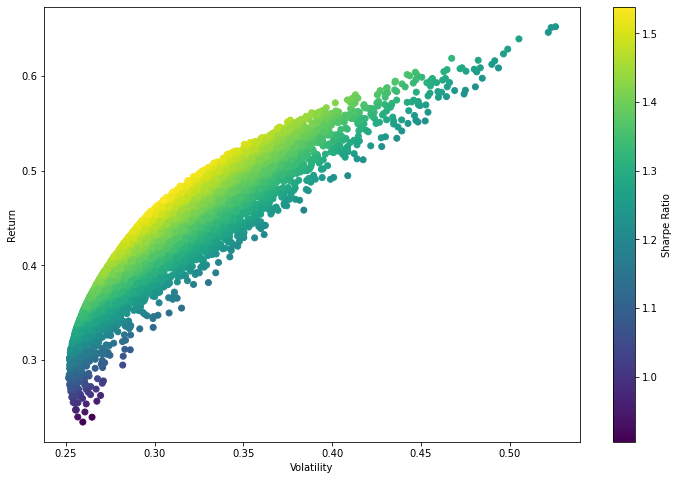

In [65]:
# plot heatmap
plt.figure(figsize=(12,8))
plt.scatter(volatility_array, returns_array, c=sharpe_array, cmap='viridis')
plt.colorbar(label='Sharpe Ratio')
plt.xlabel('Volatility')
plt.ylabel('Return')

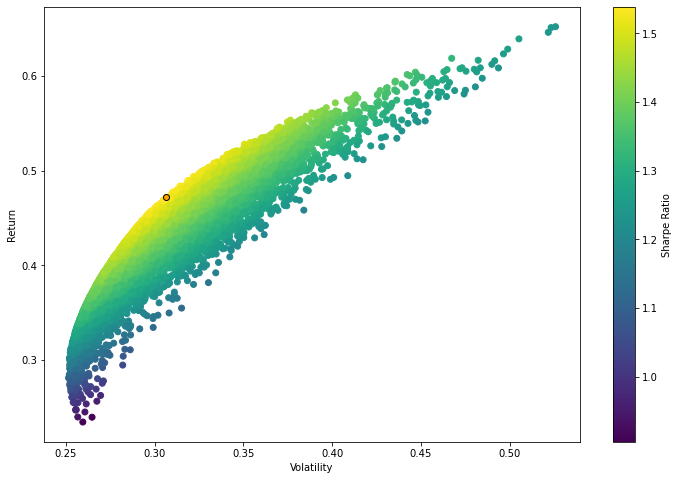

In [68]:
#Plot optimal portfolio
max_sharpe_return = returns_array[index_max_sharpe]
max_sharpe_volatility = volatility_array[index_max_sharpe]

# Plot heatmap
plt.figure(figsize=(12,8))
plt.scatter(volatility_array, returns_array, c=sharpe_array, cmap='viridis')
plt.colorbar(label='Sharpe Ratio')
plt.xlabel('Volatility')
plt.ylabel('Return')

# Add orange dot for easy viewing
plt.scatter(max_sharpe_volatility, max_sharpe_return, c='orange', edgecolors='black')